<a href="https://colab.research.google.com/github/kitty6878/DataScienceSalaryModel/blob/main/HighestAverageSalaryComputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter company location: United States
Enter experience level: Mid-level
Enter company size: M
Job Category: BI and Visualization
Job Title with Highest Average Salary: BI Analyst
Highest Average Salary: 137500.00 USD

Job Category: Data Analysis
Job Title with Highest Average Salary: Product Data Analyst
Highest Average Salary: 140000.00 USD

Job Category: Data Architecture and Modeling
Job Title with Highest Average Salary: Data Architect
Highest Average Salary: 138625.00 USD

Job Category: Data Engineering
Job Title with Highest Average Salary: Data Infrastructure Engineer
Highest Average Salary: 180827.50 USD

Job Category: Data Management and Strategy
Job Title with Highest Average Salary: Data Specialist
Highest Average Salary: 100350.00 USD

Job Category: Data Quality and Operations
Job Title with Highest Average Salary: Data Operations Engineer
Highest Average Salary: 80000.00 USD

Job Category: Data Science and Research
Job Title with Highest Average Salary: Director of Data Sc

<Figure size 1000x600 with 0 Axes>

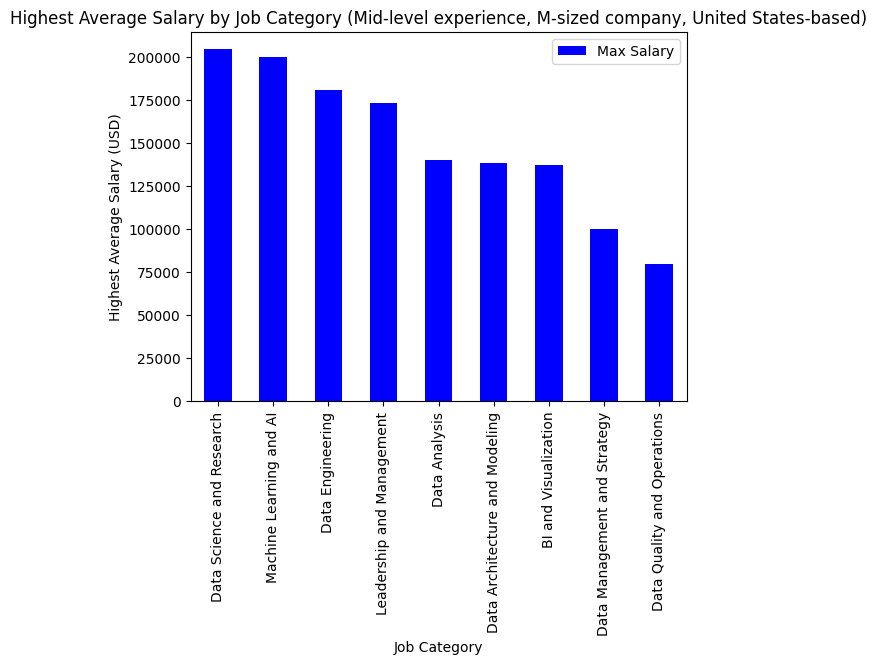

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv("jobs_in_data.csv")

# Define features and target variable
categorical_features = ['job_title', 'job_category', 'employee_residence',
                        'experience_level', 'employment_type',
                        'work_setting', 'company_location', 'company_size']
target_variable = 'salary_in_usd'

# Drop rows with NaN values in the salary column
data = data.dropna(subset=[target_variable])

# User inputs
user_company_location = input("Enter company location: ")
user_experience_level = input("Enter experience level: ")
user_company_size = input("Enter company size: ")

# Apply filters based on user inputs
filtered_data = data[
    (data['company_location'] == user_company_location) &
    (data['experience_level'] == user_experience_level) &
    (data['company_size'] == user_company_size)
]

# Prepare the dataset
X = filtered_data[categorical_features]
y = filtered_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Create preprocessing and training pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_features)],
    remainder='passthrough')

# Include Ridge regression in the pipeline for regularization
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', Ridge(alpha=1.0))
])

# Train the model
model.fit(X_train, y_train)

# Group by job category and calculate the mean salary for each category
average_salary_by_category = filtered_data.groupby(['job_category', 'job_title']).agg({'salary_in_usd': 'mean'})

# Get the job title with the highest average salary per category
max_salary_job_title_by_category = average_salary_by_category.groupby('job_category').idxmax()['salary_in_usd']
max_salary_by_category = average_salary_by_category.loc[max_salary_job_title_by_category]

# Print and plot the results
for (category, job_title), max_salary in zip(max_salary_job_title_by_category, max_salary_by_category['salary_in_usd']):
    print(f"Job Category: {category}")
    print(f"Job Title with Highest Average Salary: {job_title}")
    print(f"Highest Average Salary: {max_salary:.2f} USD\n")

plt.figure(figsize=(10, 6))
max_salary_by_category_df = pd.DataFrame(max_salary_by_category['salary_in_usd'].values, columns=['Max Salary'], index=max_salary_job_title_by_category.index)
max_salary_by_category_df.sort_values(by='Max Salary', ascending=False).plot(kind='bar', color='blue')
plt.title(f'Highest Average Salary by Job Category ({user_experience_level} experience, {user_company_size}-sized company, {user_company_location}-based)')
plt.xlabel('Job Category')
plt.ylabel('Highest Average Salary (USD)')
plt.show()
